<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-01-Dealing-With-Data/blob/master/module4-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have twice as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.2 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site seems to have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# Import pandas and numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Set URL variable
data_url = "https://raw.githubusercontent.com/BrianBehnke/DS-Sprint-01-Dealing-With-Data/master/module4-databackedassertions/persons.csv"


In [0]:
# Import data into a dataframe
persons_data_original = pd.read_csv(data_url)

In [43]:
# Look at the data
persons_data_original.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
# Unnamed column appears to be an index, will remove this column df.drop(df.columns[[0, 1, 3]], axis=1)
# persons_data = persons_data_original.drop(persons_data_original.columns[[0]], axis=1, inplace=True)
# Rename unnamed column
persons_data_original.rename( columns={'Unnamed: 0':'indexed'}, inplace=True )

In [45]:
# Look at the data again
persons_data_original.head()

,indexed,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
# Dropping indexed column
persons_data = persons_data_original.drop(['indexed'], axis=1)

In [47]:
# verify the indexed column is removed
persons_data.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [48]:
# Checking on the data types of each variable
persons_data.dtypes

age              int64
weight           int64
exercise_time    int64
dtype: object

In [49]:
# Check for Null values
persons_data.isna().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [50]:
# Get statistical info on data
persons_data.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [51]:
# Crosstab tabulation of data to find relationships
age_weight_cross = pd.crosstab(persons_data['age'], persons_data['weight'])
age_exercise_cross = pd.crosstab(persons_data['age'], persons_data['exercise_time'])
weight_exercise_cross = pd.crosstab(persons_data['weight'], persons_data['exercise_time'])

print(age_weight_cross)
print(age_exercise_cross)
print(weight_exercise_cross)


weight  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124 ...   218  219  220  221  222  223  224  225  226  227  228  229  230  231  233  234  236  237  238  239  240  241  242  244  246
age                                                                                                                                 ...                                                                                                                              
18        0    0    1    0    0    0    0    0    0    0    0    0    0    0    1    1    1    0    0    0    1    0    1    0    0 ...     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
19        0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1    0    1    0    1    0 ...     1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [107]:
# making bins for data
exercise_time_bin = pd.cut(persons_data['exercise_time'], 5)
age_bin = pd.cut(persons_data['age'], 5)
weight_bin = pd.cut(persons_data['weight'], 5)

age_weight_cross_again = pd.crosstab(age_bin, weight_bin)
age_exercise_cross_again = pd.crosstab(age_bin, exercise_time_bin)
weight_exercise_cross_again = pd.crosstab(weight_bin, exercise_time_bin)

print(age_weight_cross_again)
print(age_exercise_cross_again)
print(weight_exercise_cross_again)

weight          (99.854, 129.2]  (129.2, 158.4]  (158.4, 187.6]  (187.6, 216.8]  (216.8, 246.0]
age                                                                                            
(17.938, 30.4]               80              86              49              34               7
(30.4, 42.8]                104              62              49              31               7
(42.8, 55.2]                 78              62              49              26               8
(55.2, 67.6]                 53              71              45              44               9
(67.6, 80.0]                 60              54              66              44              22
exercise_time   (-0.3, 60.0]  (60.0, 120.0]  (120.0, 180.0]  (180.0, 240.0]  (240.0, 300.0]
age                                                                                        
(17.938, 30.4]            52             46              54              61              43
(30.4, 42.8]              52             55         

In [108]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(age_bin, exercise_time_bin, normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",0.187050,0.145570,0.242152,0.317708,0.225131
"(30.4, 42.8]",0.187050,0.174051,0.188341,0.244792,0.298429
"(42.8, 55.2]",0.147482,0.132911,0.174888,0.177083,0.350785
"(55.2, 67.6]",0.165468,0.224684,0.179372,0.213542,0.125654
"(67.6, 80.0]",0.312950,0.322785,0.215247,0.046875,0.000000


In [109]:
# Let's look at weight and exercise times
pd.crosstab(weight_bin, exercise_time_bin, normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",0.190647,0.205696,0.318386,0.411458,0.560209
"(129.2, 158.4]",0.158273,0.240506,0.300448,0.385417,0.387435
"(158.4, 187.6]",0.219424,0.294304,0.251121,0.197917,0.052356
"(187.6, 216.8]",0.273381,0.231013,0.130045,0.005208,0.000000
"(216.8, 246.0]",0.158273,0.028481,0.000000,0.000000,0.000000


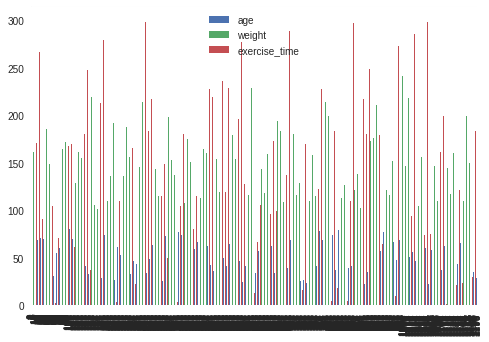

In [110]:
# Lets print the chart as is
persons_data.plot.bar();

In [111]:
# Chart is diffcult to read, lets try another way
crosstab_plot = pd.crosstab([weight_bin, exercise_time_bin], age_bin,
                 normalize='columns')
print (crosstab_plot)

age                             (17.938, 30.4]  (30.4, 42.8]  (42.8, 55.2]  (55.2, 67.6]  (67.6, 80.0]
weight          exercise_time                                                                         
(99.854, 129.2] (-0.3, 60.0]          0.039062      0.031621      0.031390      0.031532      0.085366
                (60.0, 120.0]         0.035156      0.075099      0.026906      0.045045      0.085366
                (120.0, 180.0]        0.066406      0.075099      0.040359      0.058559      0.052846
                (180.0, 240.0]        0.074219      0.098814      0.080717      0.054054      0.020325
                (240.0, 300.0]        0.097656      0.130435      0.170404      0.049550      0.000000
(129.2, 158.4]  (-0.3, 60.0]          0.027344      0.039526      0.031390      0.027027      0.056911
                (60.0, 120.0]         0.058594      0.031621      0.040359      0.090090      0.097561
                (120.0, 180.0]        0.078125      0.031621      0.05829

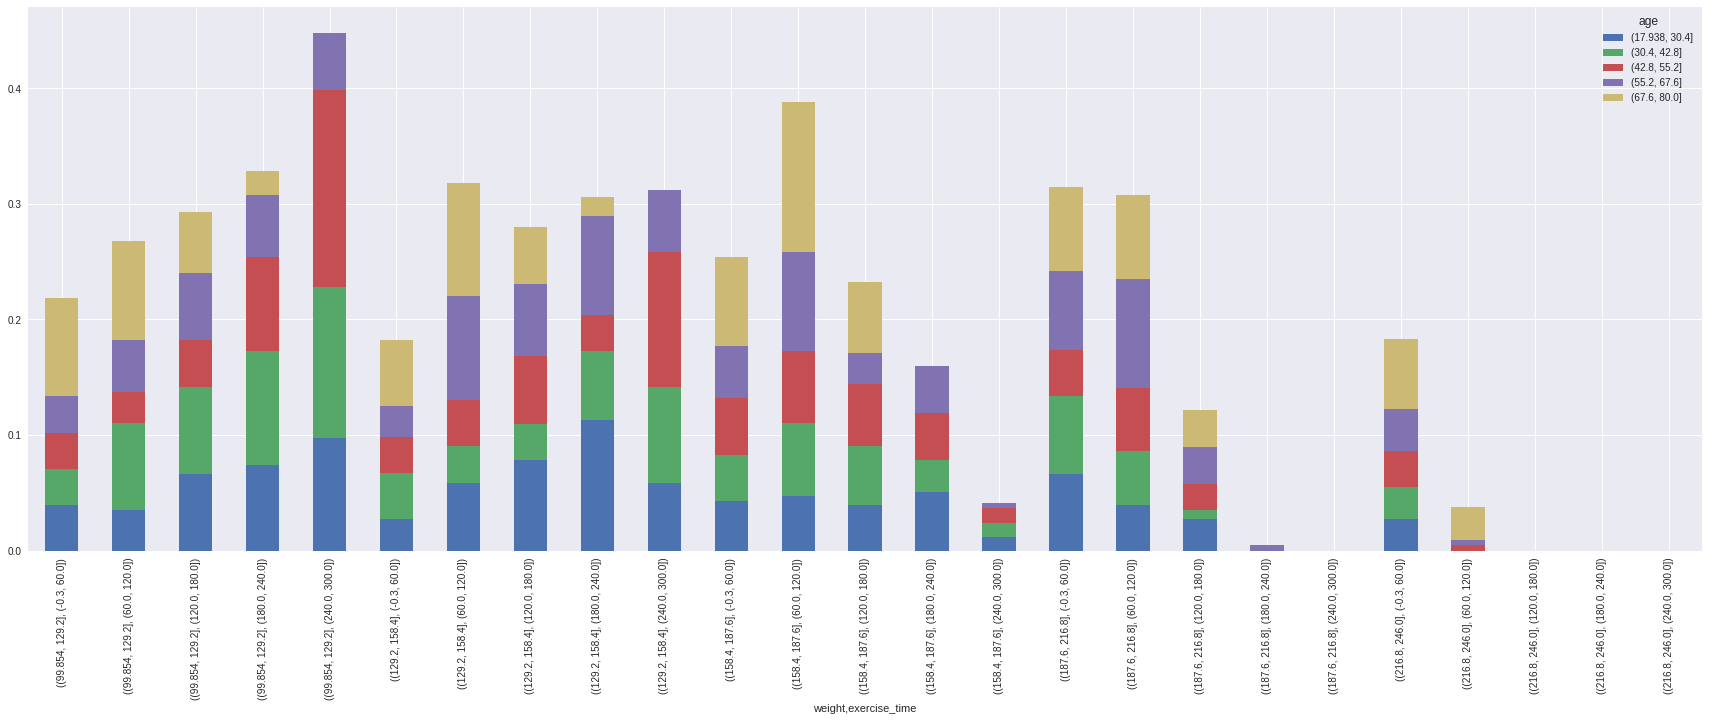

In [112]:
# Crosstab seems to get the data in a nice order for a chart
# Lets make a stacked bar chart
crosstab_plot.plot(kind='bar', stacked=True, figsize=(30,10));

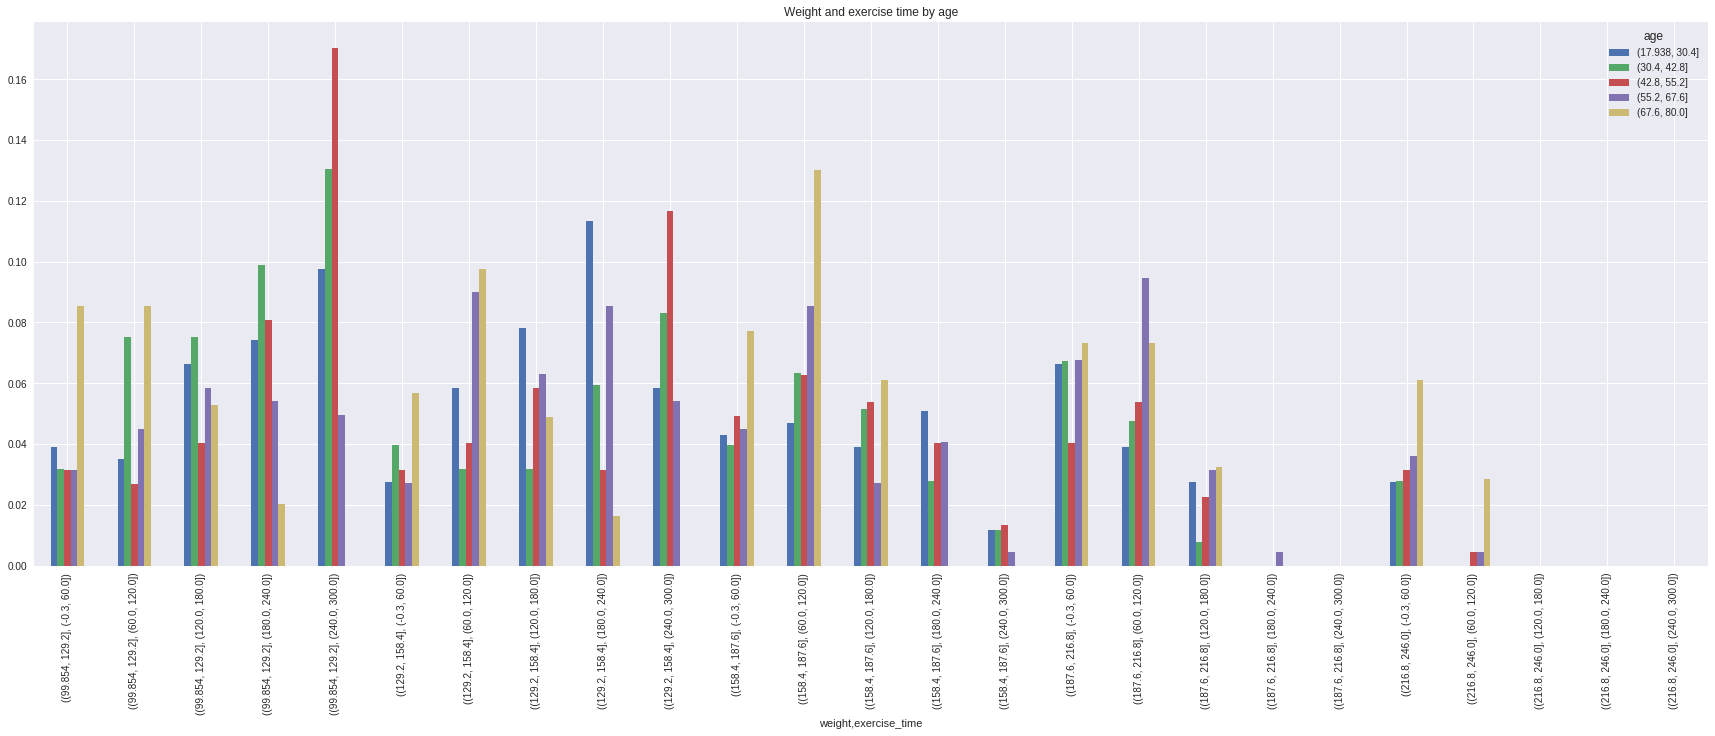

In [113]:
# Stacked is difficult to discern patterns and differences. 
# lets try a non=stacked bar chart
crosstab_plot.plot(kind='bar', stacked=False, figsize=(30,10), title='Weight and exercise time by age');

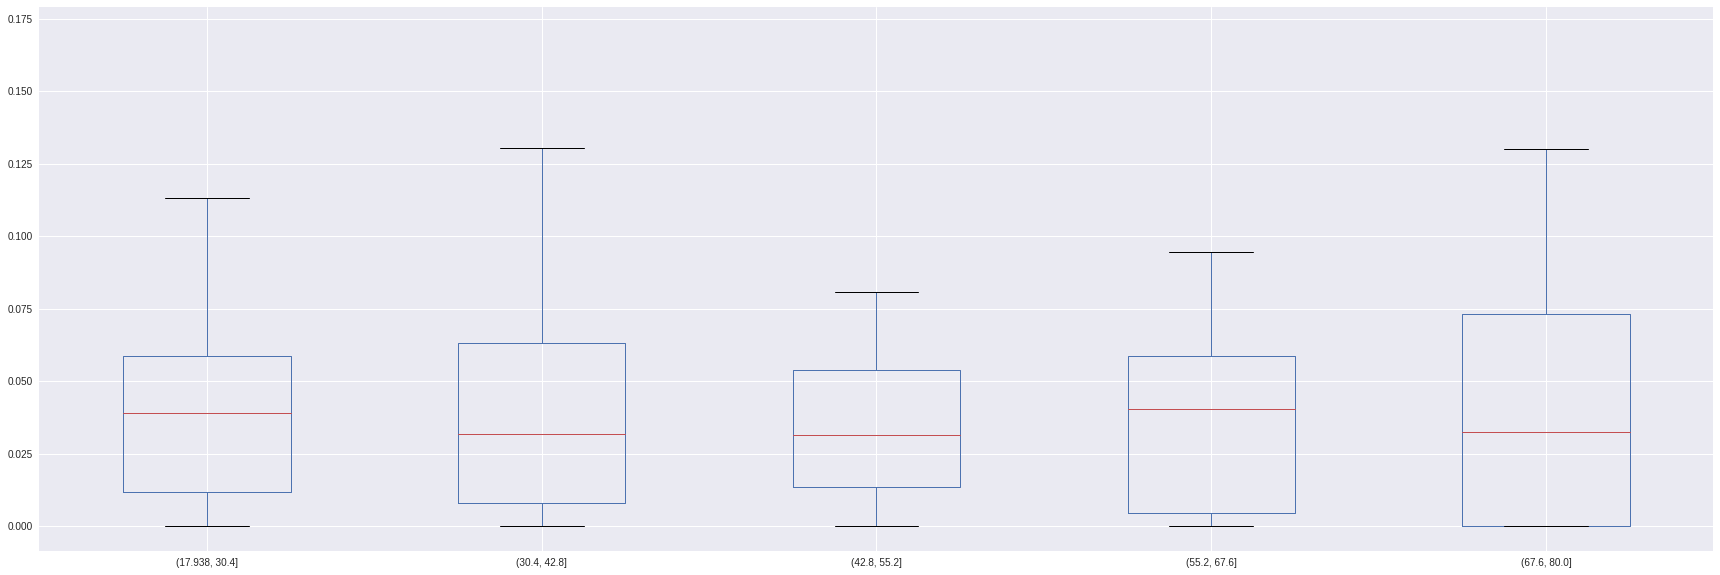

In [114]:
# Not the easiest chart to read, but looks nicer that the stacked bar chart
# lets see about a box plot
crosstab_plot.boxplot(figsize=(30,10));


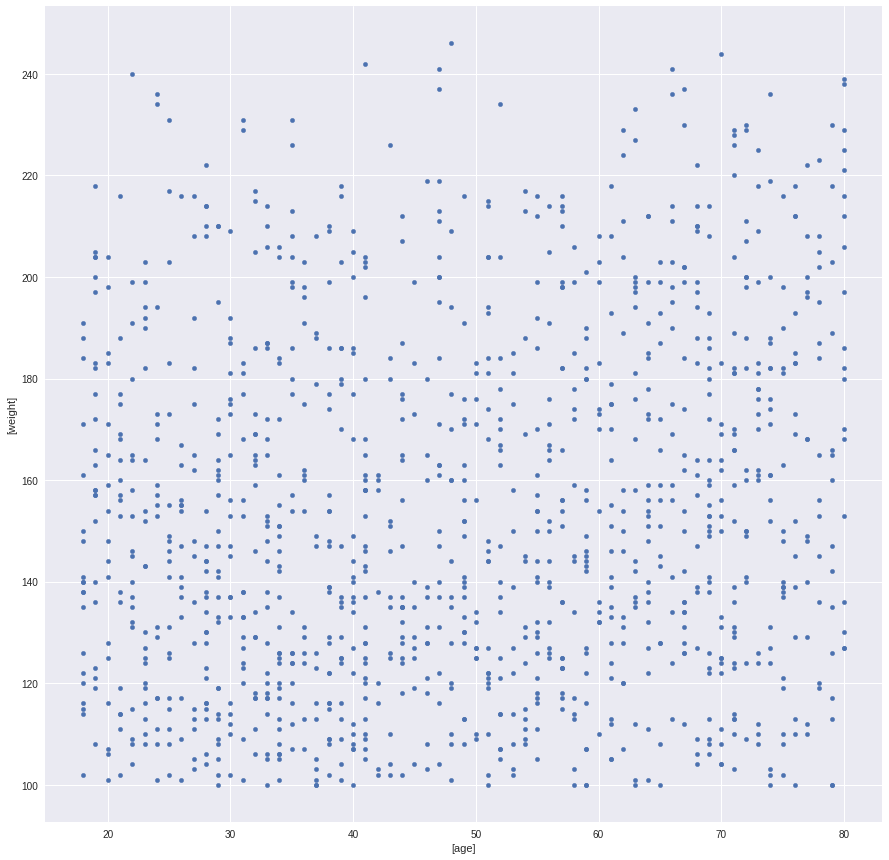

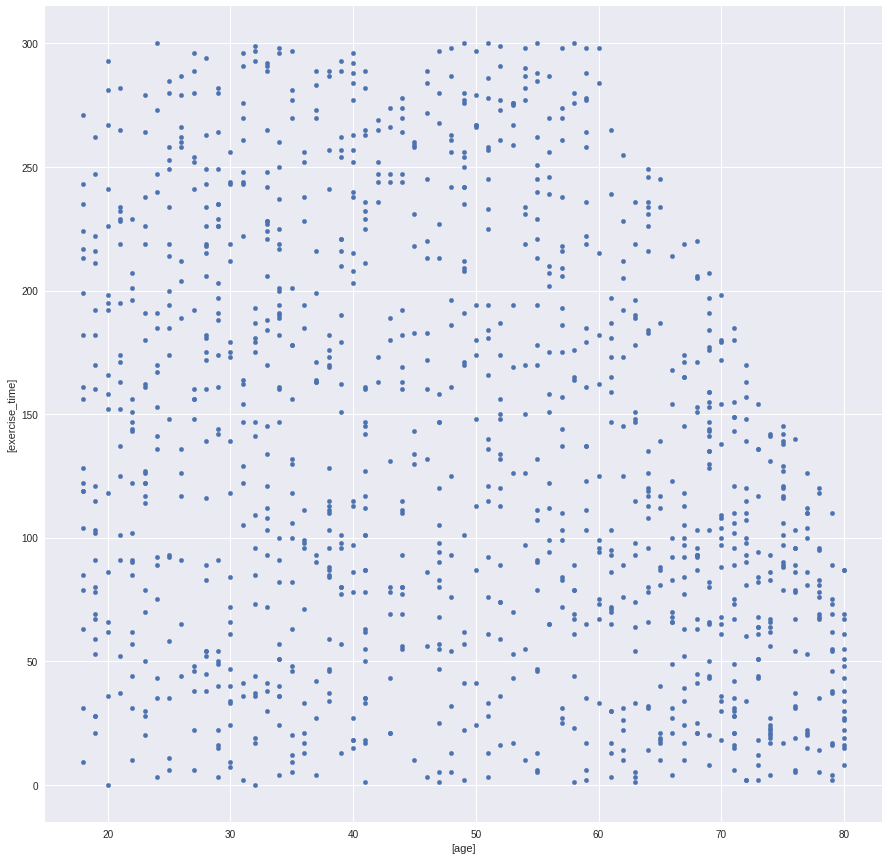

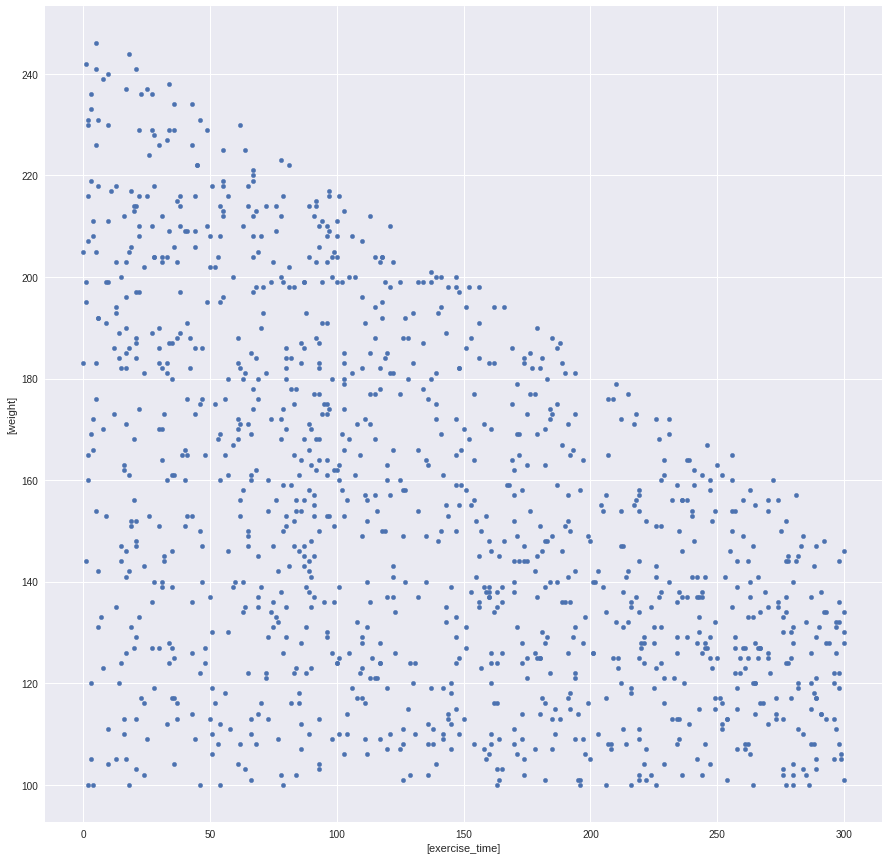

In [115]:
# Scatter plots with each set of variables
persons_data.plot.scatter(['age'], ['weight'], figsize=(15,15))
persons_data.plot.scatter(['age'], ['exercise_time'], figsize=(15,15))
persons_data.plot.scatter(['exercise_time'], ['weight'], figsize=(15,15));

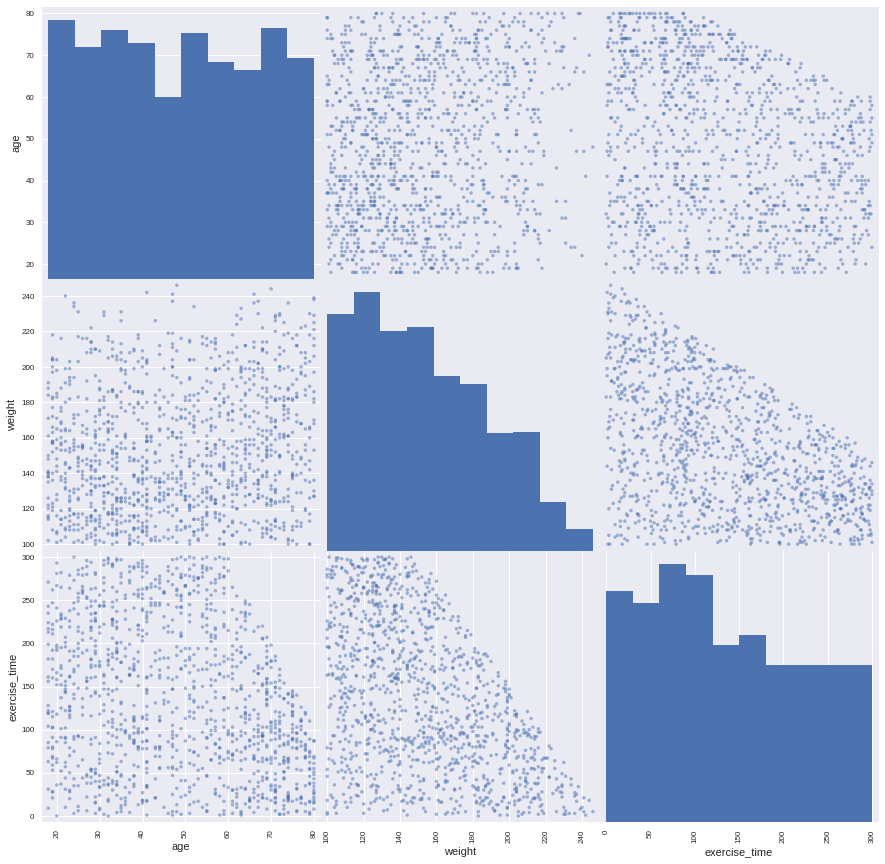

In [116]:
# Lets try the scatterplot s together in a single matrix, for easier comparison

pd.plotting.scatter_matrix(persons_data, alpha=0.5, figsize=(15,15));

# Assignment Questions and Answers!

**What are the variable types in the data?**

persons_data.dtypes   
returns the following: 
age              int64
weight           int64
exercise_time    int64

**What are the relationships between the variables?**

There does not seem to be a strong relationship between age and weight, but there is a positive relationship between age and exercise time as well as weight and exercise time. 

**Which relationships are "real", and which spurious?**

Age and weight would bot be dependant on the exercise time so that relationship would be more "real". Exercise time against age or weight could certainly be influenced by the oposite variable, age for weight and weight for age. Both age and weight can influence how long a person is able to exercise so age/exercise time and weight/exercise time relationships appear to be spurious. 



### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspierd by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)